<a href="https://colab.research.google.com/github/ahmedmoustafa/AUC-Fundamentals-of-Data-Science-II-Spring-2023/blob/main/examples/heights_weights/heights_weights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sex, Height, and Weight

![People height](https://news.mit.edu/sites/default/files/styles/news_article__image_gallery/public/images/201907/male-female-height-bell-curve-uconn-mit-sex-differences_0.jpeg?itok=PLgnFYf7)

This dataset contains the heights and weights of 1000 random males and females. We will conduct some exploration and analysis of the dataset to illustrate the statistical significance between the means of the two populations.

In [47]:
# Import the required libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot
import scipy.stats as stats

In [48]:
# Read the dataaset from the specified URL
df = pd.read_csv("https://raw.githubusercontent.com/ahmedmoustafa/AUC-Fundamentals-of-Data-Science-II-Spring-2023/main/examples/heights-and-weights/sex_height_weight.csv")
df.shape

(1000, 4)

In [49]:
df.head() # Display the the head of the dataset

,Name,Sex,Height,Weight
0,Jennifer Wolfe,Male,178.476999,88.993554
1,Tina Barber,Female,161.170414,67.397069
2,Dr. David Beasley Jr.,Female,165.886131,60.477043
3,Jake Lewis,Female,171.138179,54.824506
4,John Alvarez,Male,173.360926,81.982233


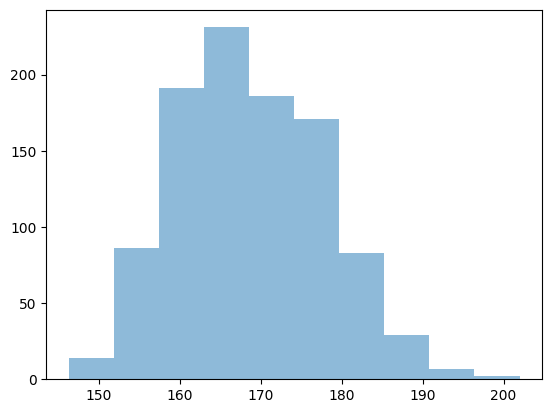

In [50]:
pyplot.hist(df['Height'], alpha=0.5) # Histogram for the population (males and females) heights
pyplot.show()

In [51]:
np.mean(df['Height']) # mean of the  population height (males and females, together)

168.6280909399918

In [52]:
df.groupby('Sex').size() # Group by Sex to find how many rows for each sex

Sex
Female    499
Male      501
dtype: int64

In [53]:
males_heights = df.loc[df['Sex'] == 'Male']['Height'] # Extract the height of the males
males_heights.head()

0     178.476999
4     173.360926
10    171.756076
12    176.693736
14    162.925575
Name: Height, dtype: float64

In [54]:
females_heights = df.loc[df['Sex'] == 'Female']['Height']  # Extract the height of the females
females_heights.head()

1    161.170414
2    165.886131
3    171.138179
5    160.595178
6    171.475277
Name: Height, dtype: float64

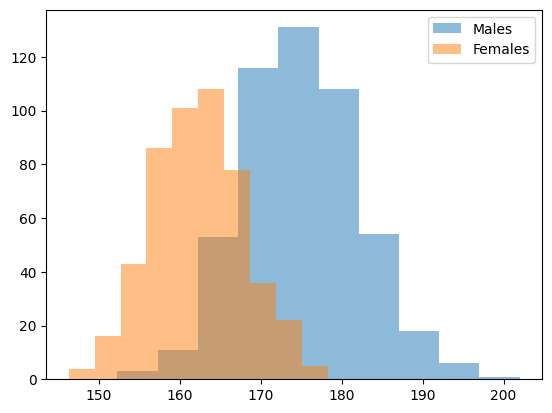

In [55]:
pyplot.hist(males_heights, alpha=0.5, label='Males') # Histogram for the males heights
pyplot.hist(females_heights, alpha=0.5, label='Females') # Histogram for the females heights
pyplot.legend(loc='upper right')
pyplot.show()

In [56]:
np.mean(males_heights) # the mean of the males heights

174.987405659491

In [57]:
np.mean(females_heights) # the mean of the females heights

162.24328798514392

## Statistical Significance in the difference between the heights according to the sex

In [58]:
stats.ttest_ind(a=males_heights, b=females_heights)

Ttest_indResult(statistic=31.339296972405272, pvalue=1.1687212633442504e-150)

The above t-test shows statistical significance p-value (1.16e-150 is much smaller than 0.05)

In [59]:
sample1 = males_heights.sample(n=10)
sample1

425    184.580421
622    188.174171
945    167.509407
897    176.026996
169    169.723847
310    173.476232
621    178.300278
21     173.419566
357    172.979390
108    176.802853
Name: Height, dtype: float64

In [60]:
np.mean(sample1)

176.09931599048736

In [61]:
sample2 = males_heights.sample(n=10)
sample2

954    174.424942
594    182.262780
851    171.111660
443    174.376160
142    163.747617
806    176.554936
82     185.345258
822    191.092287
880    192.688527
261    174.583323
Name: Height, dtype: float64

In [62]:
np.mean(sample2)

178.61874896770615

In [63]:
np.mean(sample1) - np.mean(sample2)

-2.5194329772187984

In [64]:
stats.ttest_ind(a=sample1, b=sample2)

Ttest_indResult(statistic=-0.7183683481044292, pvalue=0.48175158444288657)

In [65]:
diff = []
for i in range(10000):
    sample1 = males_heights.sample(n=10)
    sample2 = males_heights.sample(n=10)
    diff.append(np.mean(sample1) - np.mean(sample2))

np.mean(diff)

0.033017677770247555

(array([  19.,  149.,  623., 1699., 2703., 2632., 1503.,  535.,  121.,
          16.]),
 array([-11.15628399,  -8.8880656 ,  -6.61984721,  -4.35162882,
         -2.08341043,   0.18480796,   2.45302635,   4.72124475,
          6.98946314,   9.25768153,  11.52589992]),
 <BarContainer object of 10 artists>)

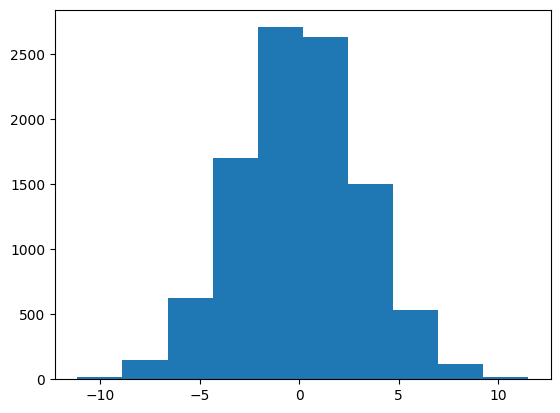

In [66]:
pyplot.hist(x=diff)

In [67]:
diff = []
for i in range(10000):
    sample1 = males_heights.sample(n=10)
    sample2 = females_heights.sample(n=10)
    diff.append(np.mean(sample1) - np.mean(sample2))

np.mean(diff)

12.806178262031125

(array([  12.,  101.,  507., 1532., 2774., 2698., 1644.,  581.,  129.,
          22.]),
 array([ 2.02376743,  4.16109457,  6.2984217 ,  8.43574884, 10.57307597,
        12.71040311, 14.84773025, 16.98505738, 19.12238452, 21.25971165,
        23.39703879]),
 <BarContainer object of 10 artists>)

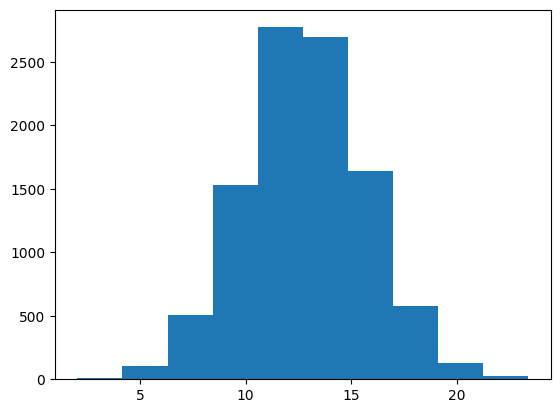

In [68]:
pyplot.hist(x=diff)